<a href="https://colab.research.google.com/github/EMockevicius/computer-vision/blob/main/geometric_2D_3D_transformations_and_panoramic_image_stiching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks/Computer vision/geometric_2D_3D_transformations_and_panoramic_image_stiching'
%ls

In [2]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#I. Geometric 2D transformations in homogenous coordinates


In [3]:
# Define Data
x = [-1, 0, 1, 1, -1, -1]
y = [1, 2, 1, -1, -1, 1]
z = [1, 1, 1, 1, 1, 1]

MyShape = np.matrix([x,y,z])

In [4]:
def display_fig(MyShape, title): #define matrix
  fig = go.Figure(
      go.Scatter(
          x = np.array(MyShape[0,:])[0],
          y = np.array(MyShape[1,:])[0],
          mode = "lines"
      )
  )
  fig.update_layout(
      xaxis = dict(range=[-6,6]),
      yaxis = dict(range=[-6,6]),
      autosize = False,
      width = 400,
      height = 400
  )
  fig.update_layout(title_text=title)
  fig.show()

In [5]:
titleini = "initial image"
display_fig(MyShape, titleini)

In [6]:
#2.a) scaling matrix
def scale(x,y): 
  return np.matrix([[x, 0, 0],
                    [0, y, 0],
                    [0, 0, 1]])

In [7]:
#scaling shape
scalex = 2
scaley = 2
scalem = scale(scalex,scaley)

scaledshape = scalem*MyShape
print("my shape:\n",MyShape)
print("\nscale:\n",scalem)
print("\nscale * shape:\n",scaledshape)

my shape:
 [[-1  0  1  1 -1 -1]
 [ 1  2  1 -1 -1  1]
 [ 1  1  1  1  1  1]]

scale:
 [[2 0 0]
 [0 2 0]
 [0 0 1]]

scale * shape:
 [[-2  0  2  2 -2 -2]
 [ 2  4  2 -2 -2  2]
 [ 1  1  1  1  1  1]]


In [8]:
titlescale = "scaled image"
display_fig(scaledshape,titlescale)

In [9]:
#2.b) translation matrix
def translate(x,y): 
  return np.float32([[1, 0, x],
                    [0, 1, y],
                    [0, 0, 1]])

In [10]:
#translating shape
translatex = 2
translatey = 2
trans = translate(translatex,translatey)

translatedshape = trans*MyShape
print("my shape:\n",MyShape)
print("\ntranslation:\n",trans)
print("\ntranslate * shape:\n",translatedshape)

my shape:
 [[-1  0  1  1 -1 -1]
 [ 1  2  1 -1 -1  1]
 [ 1  1  1  1  1  1]]

translation:
 [[1. 0. 2.]
 [0. 1. 2.]
 [0. 0. 1.]]

translate * shape:
 [[1. 2. 3. 3. 1. 1.]
 [3. 4. 3. 1. 1. 3.]
 [1. 1. 1. 1. 1. 1.]]


In [11]:
titletranslate = "translated image"
display_fig(translatedshape,titletranslate)

In [12]:
#2.c) rotation matrix
def rotation(theta): 
  return np.float32([[np.cos(theta), np.sin(theta), 0],
                    [-np.sin(theta), np.cos(theta), 0],
                    [0, 0, 1]])

In [13]:
theta = np.radians(45) #rotation angle

rotate = rotation(theta)

rotatedshape = rotate*MyShape
print("my shape:\n",MyShape)
print("\nrotation:\n",rotate)
print("\nrotation * shape:\n",rotatedshape)

my shape:
 [[-1  0  1  1 -1 -1]
 [ 1  2  1 -1 -1  1]
 [ 1  1  1  1  1  1]]

rotation:
 [[ 0.70710677  0.70710677  0.        ]
 [-0.70710677  0.70710677  0.        ]
 [ 0.          0.          1.        ]]

rotation * shape:
 [[ 0.          1.41421354  1.41421354  0.         -1.41421354  0.        ]
 [ 1.41421354  1.41421354  0.         -1.41421354  0.          1.41421354]
 [ 1.          1.          1.          1.          1.          1.        ]]


In [14]:
titlerotation = "rotation image"
display_fig(rotatedshape, titlerotation)

In [16]:
#2.d) scale -> translate -> rotate
#scale
scalex = 2
scaley = 2

finalshape1 = scale(scalex,scaley) * MyShape

#translate
translatex = 2
translatey = 2

finalshape2 = translate(translatex,translatey)*finalshape1

#rotation
theta = np.radians(45)

finalshape3 = rotation(theta) * finalshape2

titlecombo = "scale -> translate -> rotate image"
display_fig(finalshape3, titlecombo)

#2. Image geometric transformation

In [17]:
import cv2

rows -  899
collumns -  1439
dimentions -  3
shape -  (899, 1439, 3) 



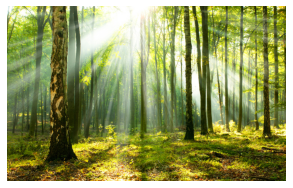

In [18]:
#Loading image
img = plt.imread('/content/drive/MyDrive/Colab Notebooks/Computer vision/geometric_2D_3D_transformations_and_panoramic_image_stiching/image.jpg')

# get the image shape
rows, cols, dim = img.shape

print("rows - ",rows)
print("collumns - ",cols)
print("dimentions - ",dim)
print("shape - ",img.shape,"\n")

#plot image
plt.figure(figsize=(5, 5))
plt.axis('off')
plt.imshow(img)

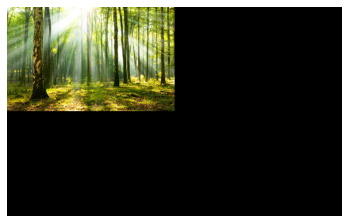

In [19]:
#scaling image
xscale = 0.5
yscale = 0.5

scaled = np.float32([[xscale, 0, 0],
                     [0, yscale, 0],
                     [0, 0, 1]])

# apply a perspective transformation to the image
scaled_img = cv2.warpPerspective(img, scaled, (cols, rows))
# disable x & y axis
plt.axis('off')
# show the resulting image
plt.imshow(scaled_img)
plt.show()

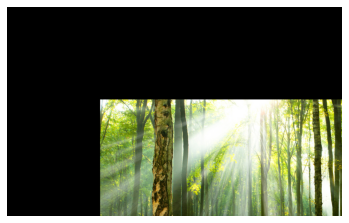

In [20]:
#translating image
xtranslate = 400
ytranslate = 400

translated = np.float32([[1, 0, xtranslate],
                         [0, 1, ytranslate],
                         [0, 0, 1]])

# apply a perspective transformation to the image
translated_img = cv2.warpPerspective(img, translated, (cols, rows))
# disable x & y axis
plt.axis('off')
# show the resulting image
plt.imshow(translated_img)
plt.show()

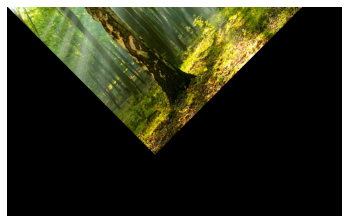

In [21]:
#rotating image 
thetaimg = np.radians(45)

rotated = np.float32([[np.cos(thetaimg), np.sin(thetaimg), 0],
                      [-np.sin(thetaimg), np.cos(thetaimg), 0],
                      [0, 0, 1]])

# apply a perspective transformation to the image
rotated_img = cv2.warpPerspective(img, rotated, (cols, rows))

# disable x & y axis
plt.axis('off')
# show the resulting image
plt.imshow(rotated_img)
plt.show()

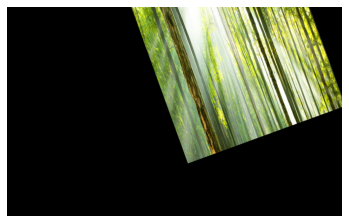

In [22]:
# scale -> translate -> rotate

#scaling image
xscalei = 0.5
yscalei = 2
scaledi = np.float32([[xscalei, 0, 0],
                     [0, yscalei, 0],
                     [0, 0, 1]])

finalimage1 = cv2.warpPerspective(img, scaledi, (cols, rows))

#translate
xtranslatei = 500
ytranslatei = 1
translatedi = np.float32([[1, 0, xtranslatei],
                         [0, 1, ytranslatei],
                         [0, 0, 1]])

finalimage2 = cv2.warpPerspective(finalimage1, translatedi, (cols, rows))



#rotation
thetai = np.radians(20)
rotatedi = np.float32([[np.cos(thetai), np.sin(thetai), 0],
                      [-np.sin(thetai), np.cos(thetai), 0],
                      [0, 0, 1]])

finalimage3 = cv2.warpPerspective(finalimage2, rotatedi, (cols, rows))

# disable x & y axis
plt.axis('off')
# show the resulting image
plt.imshow(finalimage3)
plt.show()

#3. manual panorama stitching from 2 images 

In [40]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import imutils

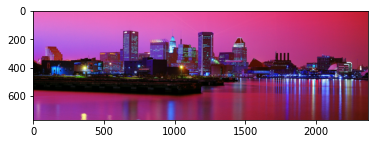

In [23]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Computer vision/geometric_2D_3D_transformations_and_panoramic_image_stiching//original.jpg')
plt.imshow(img)
plt.show()

In [25]:
from PIL import Image 

/content/drive/MyDrive/Colab Notebooks/Computer vision/geometric_2D_3D_transformations_and_panoramic_image_stiching


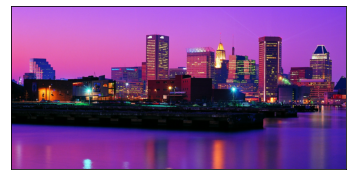

In [28]:
im = Image.open(r'/content/drive/MyDrive/Colab Notebooks/Computer vision/geometric_2D_3D_transformations_and_panoramic_image_stiching/original.jpg')

#cropping images into two seperate 1:

# Size of the image in pixels (size of original image)
width, height = im.size
 
# Setting the points for cropped image
left = 0
right = width/1.5
top = 0
bottom = height
 
# Cropped image of above dimension
im1 = im.crop((left, top, right, bottom))
 
%cd  '/content/drive/MyDrive/Colab Notebooks/Computer vision/geometric_2D_3D_transformations_and_panoramic_image_stiching'
plt.imshow(im1),plt.xticks([]), plt.yticks([])
plt.savefig('image_left.jpg', bbox_inches = 'tight',pad_inches = 0) #save image
plt.show()


/content/drive/MyDrive/Colab Notebooks/Computer vision/geometric_2D_3D_transformations_and_panoramic_image_stiching


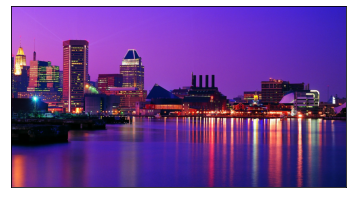

In [29]:
#cropping images into two seperate:
 
# Setting the points for cropped image
left = width/2.5
right = width
top = 0
bottom = height
 
# Cropped image of above dimension
im2 = im.crop((left, top, right, bottom))

%cd  '/content/drive/MyDrive/Colab Notebooks/Computer vision/geometric_2D_3D_transformations_and_panoramic_image_stiching' 
plt.imshow(im2), plt.xticks([]), plt.yticks([])
plt.savefig('image_right.jpg', bbox_inches = 'tight',pad_inches = 0) #save image
plt.show()


In [30]:
#removing white edges

from os import listdir, path

space_between_row = 10
new_image_path = 'resultManual.jpg'
im_dirs = ['/content/drive/MyDrive/Colab Notebooks/Computer vision/geometric_2D_3D_transformations_and_panoramic_image_stiching/images' , '/content/drive/MyDrive/Colab Notebooks/Computer vision/geometric_2D_3D_transformations_and_panoramic_image_stiching/images' ]

# get sorted list of images
im_path_list = [[path.join(p, f) for f in sorted(listdir(p))] for p in im_dirs]

# open images and calculate total widths and heights
im_list = []
total_width = 0
total_height = 0
for path_list in im_path_list:
    images = list(map(Image.open, path_list))
    widths, heights = zip(*(i.size for i in images))
    total_width = max(total_width, sum(widths))
    total_height += max(heights)
    im_list.append(images)

# concat images
new_im = Image.new('RGB', (total_width, total_height))
y_offset = 0
for images in im_list:
    x_offset = 0
    max_height = 0
    for im in images:
        new_im.paste(im, (x_offset, y_offset))
        x_offset += im.size[0]
        max_height = max(im.size[1], max_height)
    y_offset = y_offset + max_height + space_between_row

# show and save
new_im.show()
new_im.save(new_image_path)

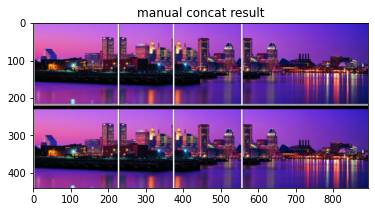

In [31]:
plt.imshow(new_im), plt.title("manual concat result")
plt.savefig('resultManual.jpg') #save image
plt.show()

#4. Automatic panorama stitching from 2 images 
example from https://github.com/niconielsen32/ComputerVision/blob/master/imageStitching/imageStitchingYT.py


/content/drive/MyDrive/Colab Notebooks/Computer vision/geometric_2D_3D_transformations_and_panoramic_image_stiching


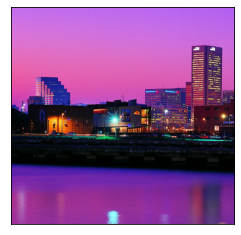

In [32]:
im = Image.open(r'/content/drive/MyDrive/Colab Notebooks/Computer vision/geometric_2D_3D_transformations_and_panoramic_image_stiching/original.jpg')
#cropping images into four seperate 1:

# Size of the image in pixels (size of original image)
width, height = im.size
 
# Setting the points for cropped image
left = 0
right = width/3
top = 0
bottom = height
 
# Cropped image of above dimension
image1 = im.crop((left, top, right, bottom))
 
%cd  '/content/drive/MyDrive/Colab Notebooks/Computer vision/geometric_2D_3D_transformations_and_panoramic_image_stiching'
plt.imshow(image1),plt.xticks([]), plt.yticks([])
plt.savefig('image_1.jpg', bbox_inches = 'tight',pad_inches = 0) #save image
plt.show()

/content/drive/MyDrive/Colab Notebooks/Computer vision/geometric_2D_3D_transformations_and_panoramic_image_stiching


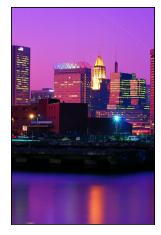

In [33]:
#cropping images into four seperate 2:

# Size of the image in pixels (size of original image)
width, height = im.size
 
# Setting the points for cropped image
left = width/3.5
right = width/2
top = 0
bottom = height
 
# Cropped image of above dimension
image2 = im.crop((left, top, right, bottom))
 
%cd  '/content/drive/MyDrive/Colab Notebooks/Computer vision/geometric_2D_3D_transformations_and_panoramic_image_stiching'
plt.imshow(image2),plt.xticks([]), plt.yticks([])
plt.savefig('image_2.jpg', bbox_inches = 'tight',pad_inches = 0) #save image
plt.show()

/content/drive/MyDrive/Colab Notebooks/Computer vision/geometric_2D_3D_transformations_and_panoramic_image_stiching


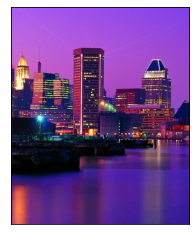

In [34]:
#cropping images into four seperate 3:

# Size of the image in pixels (size of original image)
width, height = im.size
 
# Setting the points for cropped image
left = width/2.5
right = width/1.5
top = 0
bottom = height
 
# Cropped image of above dimension
image3 = im.crop((left, top, right, bottom))
 
%cd  '/content/drive/MyDrive/Colab Notebooks/Computer vision/geometric_2D_3D_transformations_and_panoramic_image_stiching'
plt.imshow(image3),plt.xticks([]), plt.yticks([])
plt.savefig('image_3.jpg', bbox_inches = 'tight',pad_inches = 0) #save image
plt.show()

/content/drive/MyDrive/Colab Notebooks/Computer vision/geometric_2D_3D_transformations_and_panoramic_image_stiching


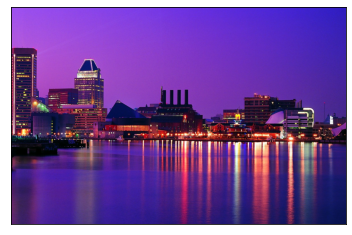

In [38]:
#cropping images into four seperate 4:

# Size of the image in pixels (size of original image)
width, height = im.size
 
# Setting the points for cropped image
left = width/2
right = width
top = 0
bottom = height
 
# Cropped image of above dimension
image4 = im.crop((left, top, right, bottom))
 
%cd  '/content/drive/MyDrive/Colab Notebooks/Computer vision/geometric_2D_3D_transformations_and_panoramic_image_stiching'
plt.imshow(image4),plt.xticks([]), plt.yticks([])
plt.savefig('image_4.jpg', bbox_inches = 'tight',pad_inches = 0) #save image
plt.show()

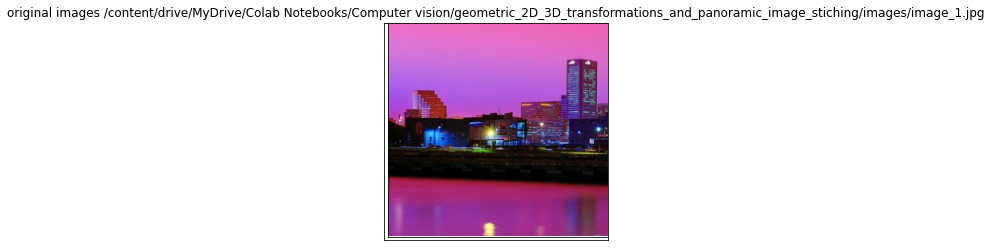

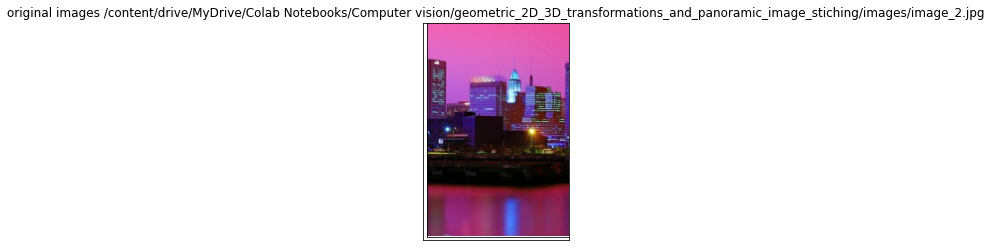

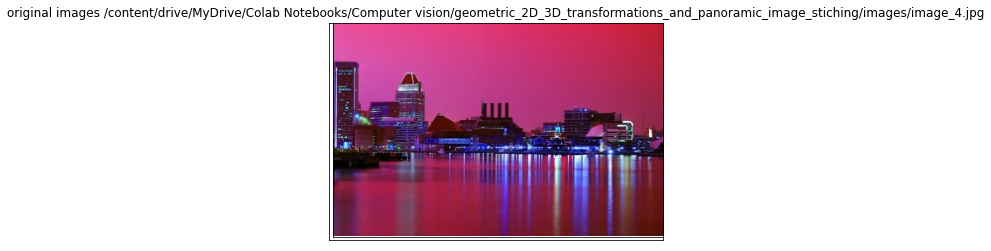

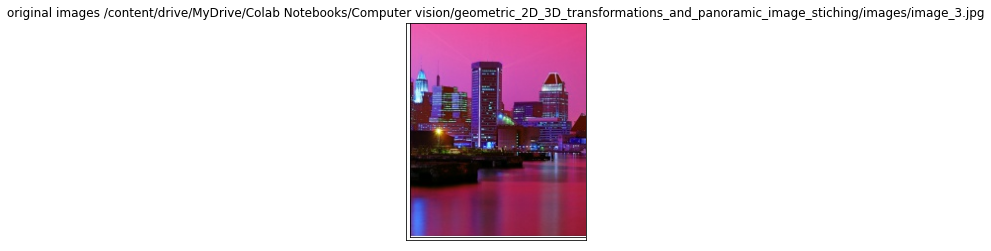

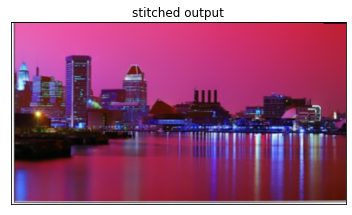

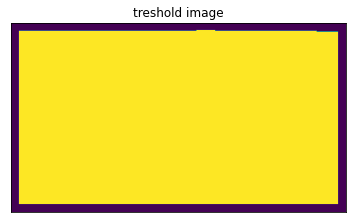

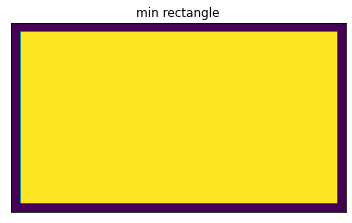

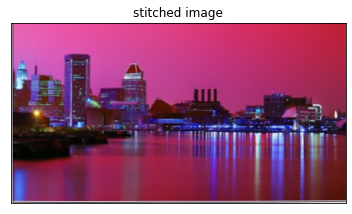

In [41]:
image_paths = glob.glob('/content/drive/MyDrive/Colab Notebooks/Computer vision/geometric_2D_3D_transformations_and_panoramic_image_stiching/images/*.jpg') #works with multiple images as long as theyre all in same folder
images = []

#loading images from folder
for image in image_paths:
    img = cv2.imread(image)
    images.append(img)
    plt.imshow(img), plt.xticks([]), plt.yticks([]), plt.title("original images " + image)
    plt.show()


imageStitcher = cv2.Stitcher_create()

error, stitched_img = imageStitcher.stitch(images) #used for testing if images were combined

if not error:

    cv2.imwrite("stitchedOutput.png", stitched_img) # imageStitcher.stitch(images)
    plt.imshow(stitched_img), plt.xticks([]), plt.yticks([]), plt.title("stitched output")
    plt.show()

    stitched_img = cv2.copyMakeBorder(stitched_img, 10, 10, 10, 10, cv2.BORDER_CONSTANT, (0,0,0)) #crating initial mask for image fusion

    gray = cv2.cvtColor(stitched_img, cv2.COLOR_BGR2GRAY) #change to grayscale
    thresh_img = cv2.threshold(gray, 0, 255 , cv2.THRESH_BINARY)[1] #change to binary

    plt.imshow(thresh_img), plt.xticks([]), plt.yticks([]), plt.title("treshold image")
    plt.show()

    contours = cv2.findContours(thresh_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #find image contours

    contours = imutils.grab_contours(contours)
    areaOI = max(contours, key=cv2.contourArea) #choose countour on maxRectangle(didziausias) (areaOI - Area of interest)

    mask = np.zeros(thresh_img.shape, dtype="uint8") #creating mask based on required size 
    x, y, w, h = cv2.boundingRect(areaOI) #max countour 
    cv2.rectangle(mask, (x,y), (x + w, y + h), 255, -1)

    minRectangle = mask.copy()
    sub = mask.copy()

    while cv2.countNonZero(sub) > 0: # while counter > 0 use cv2.erode and cv2.subtract
        minRectangle = cv2.erode(minRectangle, None)
        sub = cv2.subtract(minRectangle, thresh_img)

    contours = cv2.findContours(minRectangle.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #find contour minRectangle

    contours = imutils.grab_contours(contours)
    areaOI = max(contours, key=cv2.contourArea) #choose contour for minRectangle(maziausias)

    plt.imshow(minRectangle), plt.xticks([]), plt.yticks([]), plt.title("min rectangle")
    plt.show()

    x, y, w, h = cv2.boundingRect(areaOI) #get areaOI scale

    stitched_img = stitched_img[y:y + h, x:x + w] #stitching images

    cv2.imwrite("stitchedOutputProcessed.png", stitched_img)

    plt.imshow(stitched_img), plt.xticks([]), plt.yticks([]), plt.title("stitched image")
    plt.savefig('stitched_image.jpg', bbox_inches = 'tight',pad_inches = 0) #save image
    plt.show()

else: #if error
    print("Images could not be stitched!")
    print("Likely not enough keypoints being detected!")